In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors

from itertools import combinations
import scipy
from scipy.ndimage.filters import gaussian_filter1d
import sys
import os
import copy
atish_assay_path = 'fitness_assay_grantedits.py'
sys.path.append(os.path.dirname(os.path.expanduser(atish_assay_path)))
import fitness_assay_grantedits as atish

tools_path = '../code/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools

sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()
from tools import mutant_colorset

In [3]:
technical_fitness_data= p.read_csv('../data/fitnesses_Final_Technical_byTimepoint.csv')

In [5]:
f_cols = [col.split('_fitness')[0] for col in technical_fitness_data.columns if '_fitness' in col]

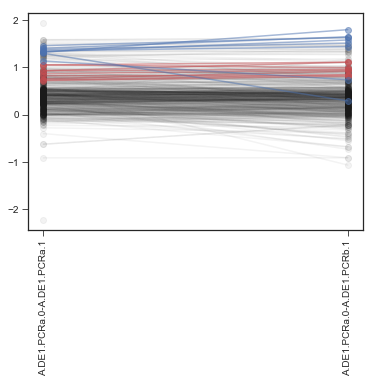

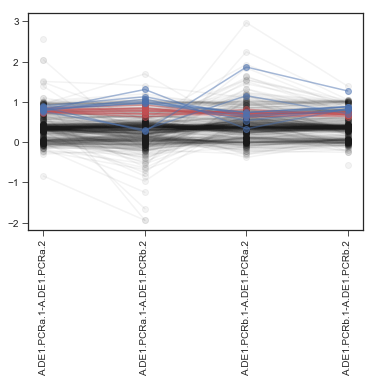

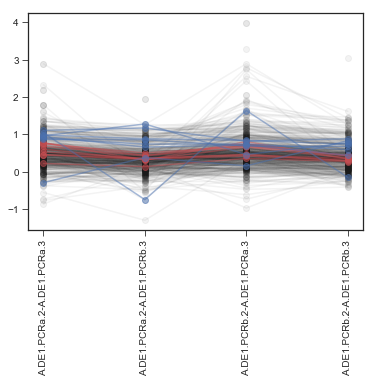

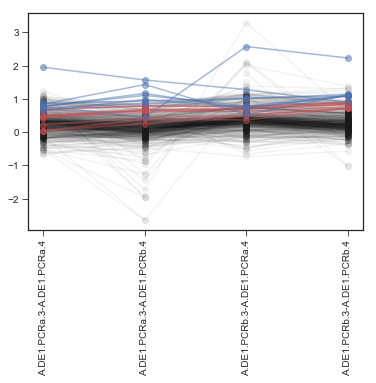

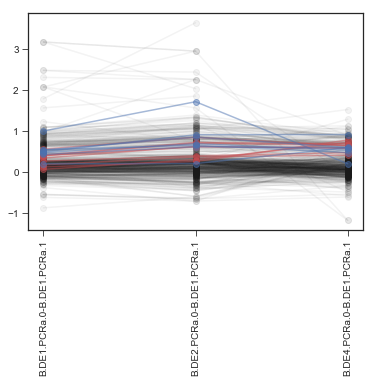

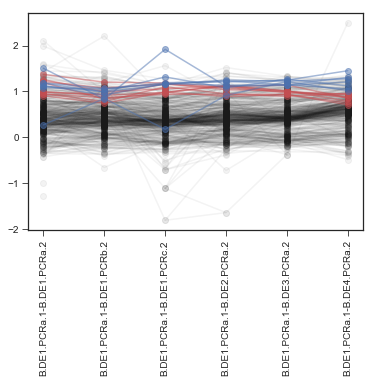

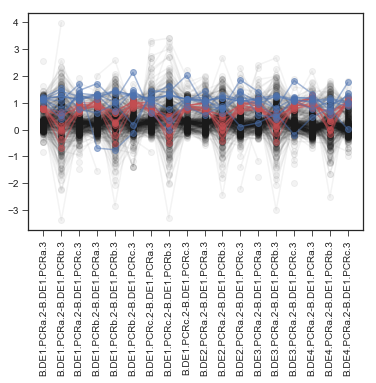

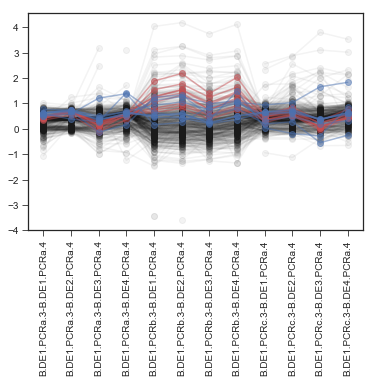

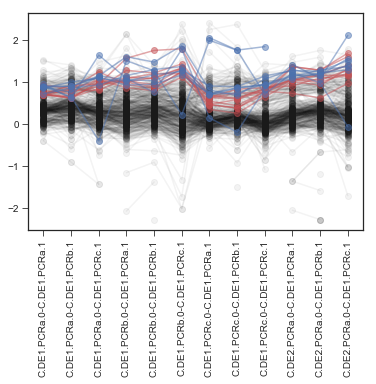

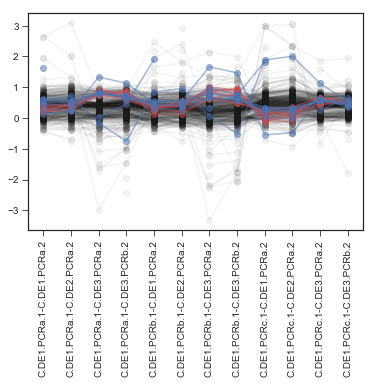

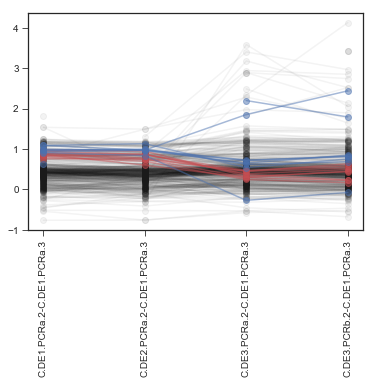

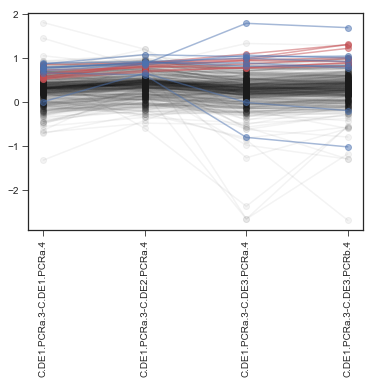

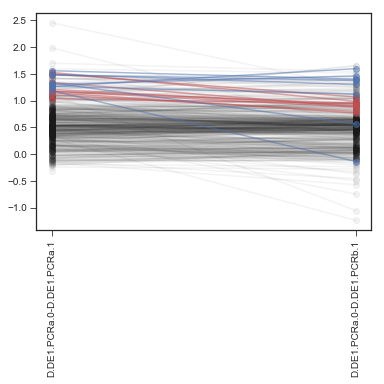

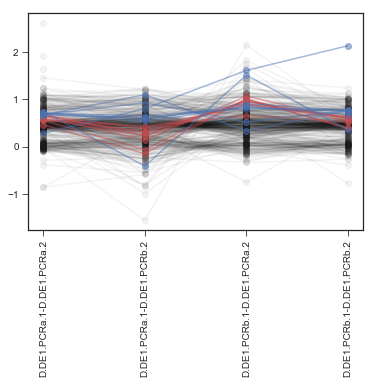

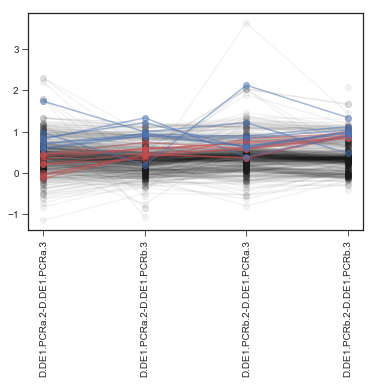

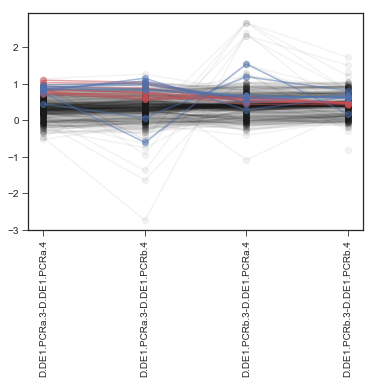

In [29]:
for condition in ['A','B','C','D']:
    for t in range(4):
#         print(t)
        these_t_fs = [col for col in f_cols if ((f'{condition}.' in col) and (f'.{t}' in col) and (f'.{t+1}' in col)) ]
#         print(these_t_fs)
        plt.figure()
        for bc in range(len(technical_fitness_data['barcode'].values)):
            if technical_fitness_data['barcode'].values[bc] > 9000100:
                plt.plot(range(len(these_t_fs)),technical_fitness_data[[col+'_fitness' for col in these_t_fs]].values[bc,:],'o-',color='b',alpha=0.5)
            elif technical_fitness_data['barcode'].values[bc] > 9000000:
                plt.plot(range(len(these_t_fs)),technical_fitness_data[[col+'_fitness' for col in these_t_fs]].values[bc,:],'o-',color='r',alpha=0.5)
            else:
                plt.plot(range(len(these_t_fs)),technical_fitness_data[[col+'_fitness' for col in these_t_fs]].values[bc,:],'o-',color='k',alpha=0.05)
            
        plt.xticks(range(len(these_t_fs)),these_t_fs,rotation=90)
        plt.savefig(f'../figures/supplemental_figures/technical_variation_by_time_{condition}_{t}.pdf',bbox_inches='tight')
        

In [30]:
technical_fitness_data

,A.DE1.PCRa.0-A.DE1.PCRa.1_error,A.DE1.PCRa.0-A.DE1.PCRa.1_fitness,A.DE1.PCRa.0-A.DE1.PCRb.1_error,A.DE1.PCRa.0-A.DE1.PCRb.1_fitness,A.DE1.PCRa.1-A.DE1.PCRa.2_error,A.DE1.PCRa.1-A.DE1.PCRa.2_fitness,A.DE1.PCRa.1-A.DE1.PCRb.2_error,A.DE1.PCRa.1-A.DE1.PCRb.2_fitness,A.DE1.PCRa.2-A.DE1.PCRa.3_error,A.DE1.PCRa.2-A.DE1.PCRa.3_fitness,...,D.DE1.PCRb.1-D.DE1.PCRb.2_fitness,D.DE1.PCRb.2-D.DE1.PCRa.3_error,D.DE1.PCRb.2-D.DE1.PCRa.3_fitness,D.DE1.PCRb.2-D.DE1.PCRb.3_error,D.DE1.PCRb.2-D.DE1.PCRb.3_fitness,D.DE1.PCRb.3-D.DE1.PCRa.4_error,D.DE1.PCRb.3-D.DE1.PCRa.4_fitness,D.DE1.PCRb.3-D.DE1.PCRb.4_error,D.DE1.PCRb.3-D.DE1.PCRb.4_fitness,barcode
0,1.0,0.435465,1.0,0.484786,1.0,0.362579,1.0,0.403741,1.0,0.391860,...,0.483026,1.0,0.416459,1.0,0.308310,1.0,0.326480,1.0,0.418366,53
1,1.0,1.242583,1.0,1.282752,1.0,0.965565,1.0,1.044407,1.0,1.220516,...,1.104586,1.0,1.108144,1.0,1.052665,1.0,1.023821,1.0,1.042826,151
2,1.0,0.260802,1.0,0.342718,1.0,0.463783,1.0,0.467790,1.0,0.627585,...,0.358993,1.0,0.422842,1.0,0.419066,1.0,0.364356,1.0,0.370871,262
3,1.0,0.951995,1.0,1.002718,1.0,0.837633,1.0,0.887746,1.0,0.922170,...,0.932259,1.0,0.918013,1.0,0.813269,1.0,0.825730,1.0,0.860703,273
4,1.0,1.004487,1.0,1.027672,1.0,0.763093,1.0,0.808211,1.0,0.735867,...,0.737175,1.0,0.698941,1.0,0.782027,1.0,0.736364,1.0,0.757593,323
5,1.0,1.514501,1.0,1.420909,1.0,0.975879,1.0,0.935567,1.0,1.110054,...,1.002452,1.0,1.206367,1.0,1.073881,1.0,0.929821,1.0,0.897489,415
6,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,499
7,1.0,0.343895,1.0,0.358733,1.0,0.307174,1.0,0.316795,1.0,0.914623,...,0.469264,1.0,0.309844,1.0,0.327531,1.0,0.271300,1.0,0.412517,622
8,1.0,1.543364,1.0,1.475816,1.0,0.941197,1.0,0.980244,1.0,1.428062,...,1.047387,1.0,1.295882,1.0,1.149970,1.0,1.006939,1.0,1.000786,689
9,1.0,0.558024,1.0,0.503270,1.0,0.297986,1.0,0.219698,1.0,0.360968,...,0.420185,1.0,0.318083,1.0,0.321965,1.0,0.404758,1.0,0.443279,697
